In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
stateValue = np.random.normal(size=(4,4))
stateValue[3, 3] = 0    

In [41]:
actions = np.array([[0,1], [1,0], [-1,0], [0,-1]]) # First index is up/down, second left/right

In [42]:
policy = np.random.randint(4, size = (4, 4))

In [43]:
rewards = np.ones((4,4)) * -1 # Every move is -1 except the ones that bring you in the terminal state.
rewards[3,3] = 0

In [44]:
def visualize_state_value(data):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.matshow(data, cmap='seismic')
    for (i, j), z in np.ndenumerate(data):
        ax.text(j, i, '{:0.001f}'.format(z), ha='center', va='center',bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

In [45]:
def move_all(state, actions):
    resultingStates = np.empty_like(actions)
    for idx, action in enumerate(actions):
        nextState = state + action
        nextState = np.clip(nextState, a_min = 0, a_max=3)
        resultingStates[idx] = nextState
    return resultingStates
    

In [46]:
def move(state, policy, actions):
    idx = policy[tuple(state)]
    action = actions[idx].copy()
    nextState = state + action
    nextState = np.clip(nextState, a_min = 0, a_max=3)
    return nextState
    

In [47]:
# Not used. Stochastic because the move_all() function is used. 
def stochasticPolicyEvaluation(stateValues, rewards, actions, discount, theta):
    while True:
        delta = 0
        for i in reversed(range(len(stateValues))):
            for j in reversed(range(len(stateValues))):
                if (i,j) == (3,3): continue
                currentValue = stateValues[i,j].copy()
                currentState = np.array((i,j))
                nextStates = move_all(currentState, actions)
                nextRewards = np.array([rewards[tuple(state)] for state in nextStates])
                nextStateValues = np.array([stateValues[tuple(state)] for state in nextStates])
                stateValues[i,j] = np.sum(policy[i, j] * (nextRewards + discount * nextStateValues))
                delta = np.max((delta, np.abs(currentValue - stateValue[i, j])))
        print("iteration done!")
        if delta <= theta: break
    return stateValues


In [48]:
def policyEvaluation(stateValues, policy, rewards, actions, discount, theta, n_iter):
    stateVals = stateValues.copy()
    for i in range(n_iter):
        delta = 0
        for i in reversed(range(len(stateValues))):
            for j in reversed(range(len(stateValues))):
                if (i,j) == (3,3): continue
                currentValue = stateVals[i,j].copy()
                currentState = np.array((i,j))
                nextState = move(currentState, policy, actions)
                nextReward = rewards[tuple(nextState)]
                nextStateValue = stateVals[tuple(nextState)]
                stateVals[i,j] = nextReward + discount * nextStateValue
                delta = np.max((delta, np.abs(currentValue - stateVals[i, j])))
        if delta <= theta: break
    return stateVals


In [49]:
def policyImprovement(stateValues, policy, rewards, actions, discount):
    policy_stable = True
    newPolicy = policy.copy()
    for i in range(len(stateValues)):
        for j in range(len(stateValues)):
            if (i,j) == (3,3): continue
            currentAction = newPolicy[i, j].copy()
            currentState = np.array((i,j))
            nextStates = move_all(currentState, actions)
            nextRewards = np.array([rewards[tuple(state)] for state in nextStates])
            nextStateValues = np.array([stateValues[tuple(state)] for state in nextStates])
            vals = nextRewards + discount  * nextStateValues
            bestActions = np.flatnonzero(vals == np.max(vals))
            bestAction = np.random.choice(bestActions) if len(bestActions) > 1 else bestActions[0]
            newPolicy[i, j] = bestAction
            policy_stable = True if currentAction == bestAction and policy_stable else False
    return newPolicy, policy_stable

In [50]:
def policyIteration(stateValues, policy, rewards, actions, discount, theta, n_iter):
    while True:
        stateValues = policyEvaluation(stateValues, policy, rewards, actions, discount, theta, n_iter)
        policy, policy_stable  = policyImprovement(stateValues, policy, rewards, actions, discount)
        if policy_stable: break
    return stateValues, policy               

In [51]:
convergedStateValue, optimalPolicy = policyIteration(stateValue, policy, rewards, actions, 1, 2, 10000)

# Original state values and policy

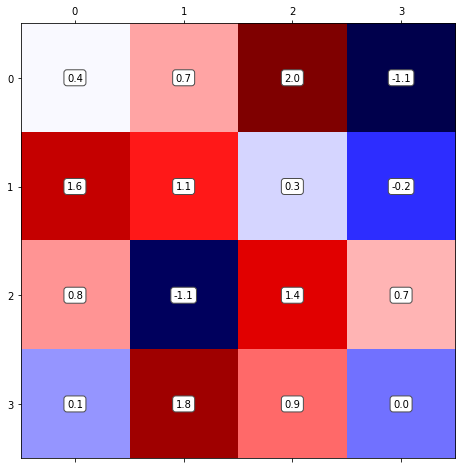

In [52]:
visualize_state_value(stateValue)   

In [53]:
textMap = {0: "right",
           1: "down",
           2: "up",
           3: "left"}

policyText = []
for action in np.nditer(policy):
    policyText.append(textMap[int(action)])

policyText = np.array(policyText).reshape(4,4)

policyText

array([['down', 'down', 'up', 'left'],
       ['left', 'left', 'up', 'down'],
       ['up', 'right', 'up', 'up'],
       ['down', 'up', 'up', 'right']], dtype='<U5')

# Converged state values and optimal policy

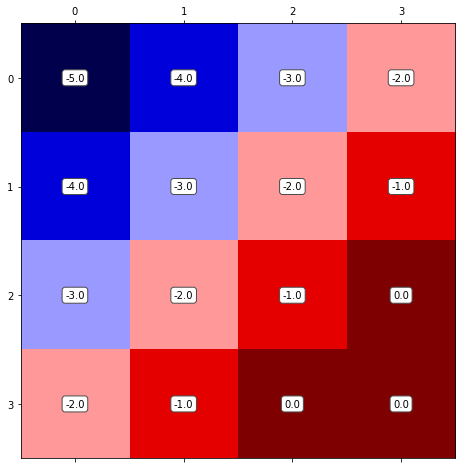

In [54]:
visualize_state_value(convergedStateValue)

In [55]:
actions

array([[ 0,  1],
       [ 1,  0],
       [-1,  0],
       [ 0, -1]])

In [56]:
textMap = {0: "right",
           1: "down",
           2: "up",
           3: "left"}

policyText = []
for action in np.nditer(optimalPolicy):
    policyText.append(textMap[int(action)])

policyText = np.array(policyText).reshape(4,4)

policyText

array([['right', 'right', 'down', 'down'],
       ['down', 'down', 'right', 'down'],
       ['down', 'down', 'down', 'down'],
       ['right', 'right', 'right', 'right']], dtype='<U5')